In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [28]:
## best parameters from the mcmc
best_mcmc = pd.read_csv("best_mcmc.csv")
flux_best_mcmc = best_mcmc["flux_normalized"]
time_best_mcmc = best_mcmc["Days"]

##same but not interpolated 
mcmc_no_interpolated = pd.read_csv("mcmc_no_interpolated.csv")
flux_mcmc_no_interpolated = mcmc_no_interpolated["flux_normalized"]
time_mcmc_no_interpolated = mcmc_no_interpolated["Days"]

##paper parameters
paper_parameters = pd.read_csv("paper_parameters.csv")
flux_paper_parameters = paper_parameters["flux_normalized"]
time_paper_parameters= paper_parameters["Days"]

##tess_curve
tess_curve = pd.read_csv("tess_curve.csv")
flux_tess = tess_curve["flux"]
time_tess = tess_curve["time"]





The angular radius of a circular stellar spot on the surface of the star is defined as

\begin{equation}
\theta_{\rm spot} = \arcsin\left( \frac{r_{\rm spot}}{R_\star} \right),
\end{equation}

where $r_{\rm spot}$ is the physical radius of the spot measured on the stellar surface and $R_\star$ is the stellar radius.

Let us define the dimensionless quantity

\begin{equation}
x = \frac{r_{\rm spot}}{R_\star},
\end{equation}

with an associated uncertainty $\sigma_x$. The uncertainty in the angular radius $\theta_{\rm spot}$ is obtained using first-order error propagation. For a function $y = f(x)$, the propagated uncertainty is given by

\begin{equation}
\sigma_y = \left| \frac{df}{dx} \right| \sigma_x .
\end{equation}

In this case, the function is

\begin{equation}
f(x) = \arcsin(x),
\end{equation}

whose derivative is

\begin{equation}
\frac{df}{dx} = \frac{1}{\sqrt{1 - x^2}}.
\end{equation}

Therefore, the uncertainty in the angular radius is

\begin{equation}
\boxed{
\sigma_{\theta_{\rm spot}} =
\frac{\sigma_x}{\sqrt{1 - x^2}}
=
\frac{\sigma_{r_{\rm spot}/R_\star}}
{\sqrt{1 - \left( \frac{r_{\rm spot}}{R_\star} \right)^2}}
}
\end{equation}

For the values obtained in this work,

\begin{equation}
\frac{r_{\rm spot}}{R_\star} = 0.126 \pm 0.012,
\end{equation}

the uncertainty becomes

\begin{equation}
\sigma_{\theta_{\rm spot}} =
\frac{0.012}{\sqrt{1 - 0.126^2}}
\approx 0.012 \, {\rm rad}.
\end{equation}

Thus, the angular radius of the spot is

\begin{equation}
\boxed{
\theta_{\rm spot} = 0.126 \pm 0.012 \, {\rm rad},
}
\end{equation}

which corresponds to

\begin{equation}
\theta_{\rm spot} = 7.22^\circ \pm 0.69^\circ .
\end{equation}

For small spot sizes ($r_{\rm spot}/R_\star \ll 1$), the approximation
$\theta_{\rm spot} \approx r_{\rm spot}/R_\star$ holds, and the difference
between the exact and approximate expressions is below the percent level.

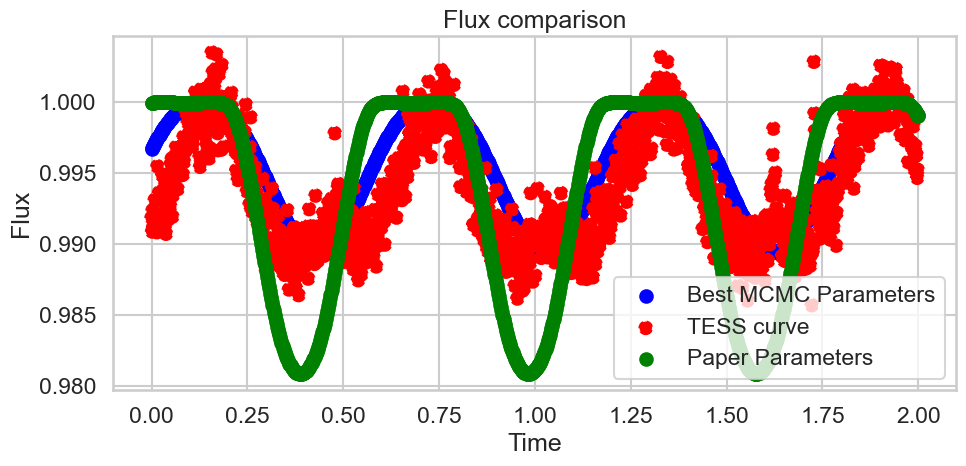

In [59]:
plt.figure(figsize=(10, 5))
plt.scatter(time_mcmc_no_interpolated, flux_mcmc_no_interpolated, label='Best MCMC Parameters', color='blue', marker='o', linestyle='-')
plt.scatter(time_mcmc_no_interpolated, flux_tess, label='TESS curve', color='red', marker='o', linestyle='--')
plt.scatter(time_mcmc_no_interpolated, flux_paper_parameters, label='Paper Parameters', color='green', marker='o', linestyle='-')
#plt.scatter(tess_time, simulated_flux2, label='Simulated', color='green', marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("Flux comparison")
plt.legend()

plt.tight_layout()

plt.show()

In [43]:
residuals = -flux_mcmc_no_interpolated+flux_tess

/var/folders/q8/yvk_kx2x789_cz2jkdkx2mzh0000gn/T/ipykernel_28163/3808396166.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


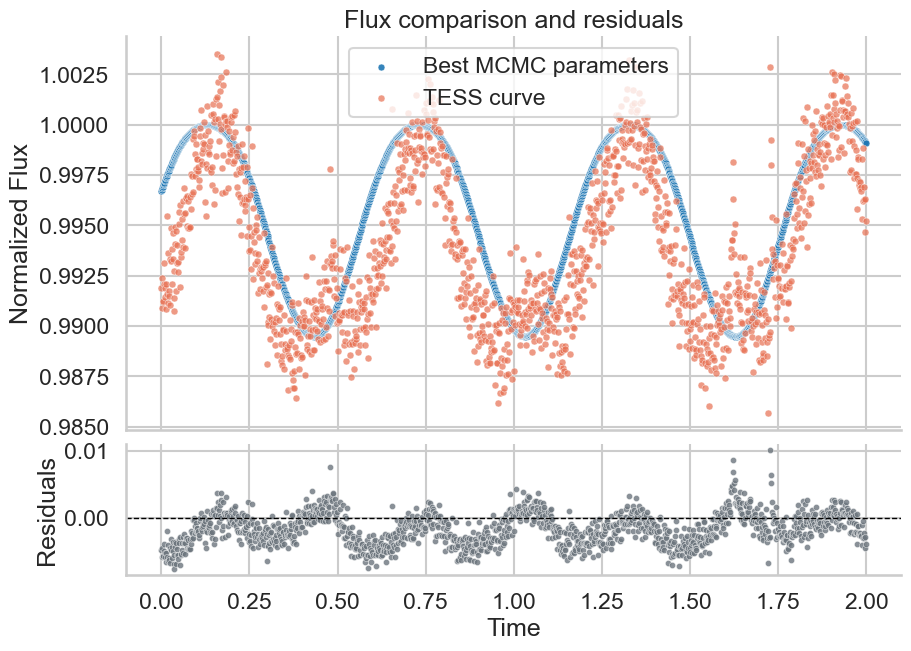

In [61]:
# Estilo general
sns.set_theme(
    style="whitegrid",
    context="talk",
    font_scale=1.0
)

# DataFrame
df = pd.DataFrame({
    "Time": time_mcmc_no_interpolated,
    "Flux_MCMC": flux_mcmc_no_interpolated,
    "Flux_TESS": flux_tess,
    "Residuals": residuals
})

# Figura con dos paneles
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(10, 7),
    sharex=True,
    gridspec_kw={"height_ratios": [3, 1], "hspace": 0.05}
)

# ─────────────────────
# Panel superior: Curvas
# ─────────────────────
sns.scatterplot(
    data=df,
    x="Time",
    y="Flux_MCMC",
    ax=ax1,
    label="Best MCMC parameters",
    s=25,
    alpha=0.9,
    color="#1f77b4"
)

sns.scatterplot(
    data=df,
    x="Time",
    y="Flux_TESS",
    ax=ax1,
    label="TESS curve",
    s=25,
    alpha=0.7,
    color="#e76f51"
)

ax1.set_ylabel("Normalized Flux")
ax1.legend(frameon=True)
ax1.set_title("Flux comparison and residuals")
sns.despine(ax=ax1)

# ─────────────────────
# Panel inferior: Residuos
# ─────────────────────
sns.scatterplot(
    data=df,
    x="Time",
    y="Residuals",
    ax=ax2,
    s=20,
    alpha=0.8,
    color="#6c757d"
)

# Línea cero (clave para sanity check)
ax2.axhline(0, color="black", linestyle="--", linewidth=1)

ax2.set_xlabel("Time")
ax2.set_ylabel("Residuals")
sns.despine(ax=ax2)

plt.tight_layout()


plt.show()

In [52]:
mse = mean_squared_error(flux_mcmc_no_interpolated,flux_tess)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 8.563892237775602e-06


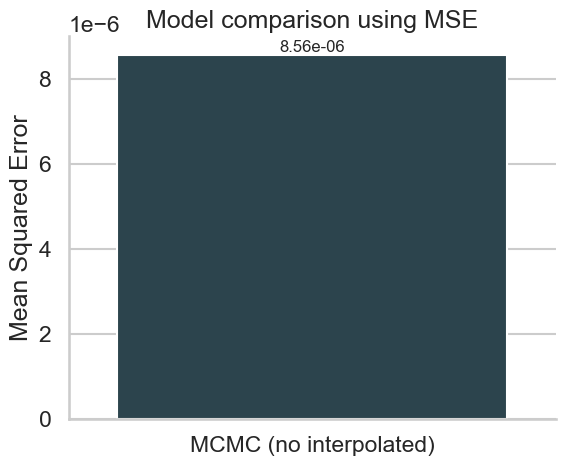

In [54]:
sns.set_theme(
    style="whitegrid",
    context="talk",
    font_scale=1.0
)

# DataFrame de MSEs (fácil de extender)
df_mse = pd.DataFrame({
    "Model": ["MCMC (no interpolated)"],
    "MSE": [mse]
})

plt.figure(figsize=(6, 5))

sns.barplot(
    data=df_mse,
    x="Model",
    y="MSE",
    color="#264653"
)

plt.ylabel("Mean Squared Error")
plt.xlabel("")
plt.title("Model comparison using MSE")

# Mostrar valor numérico encima de la barra
for i, v in enumerate(df_mse["MSE"]):
    plt.text(i, v, f"{v:.2e}", ha="center", va="bottom", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

In [57]:

# Calcular MSEs

mse_no_interp = mean_squared_error(flux_tess, flux_mcmc_no_interpolated)
mse_paper = mean_squared_error(flux_tess, flux_paper_parameters)

# DataFrame resumen
df_mse = pd.DataFrame({
    "Model": [
        "Best MCMC (no interpolated)",
        "Paper parameters"
    ],
    "MSE": [
        mse_no_interp,
        mse_paper
    ]
})

print(df_mse)


                         Model       MSE
0  Best MCMC (no interpolated)  0.000009
1             Paper parameters  0.000028


/var/folders/q8/yvk_kx2x789_cz2jkdkx2mzh0000gn/T/ipykernel_28163/1119901709.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/q8/yvk_kx2x789_cz2jkdkx2mzh0000gn/T/ipykernel_28163/1119901709.py:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(


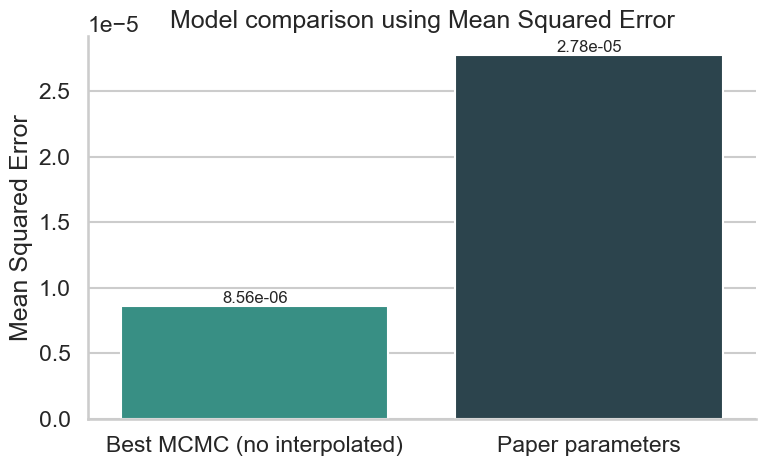

In [63]:
sns.set_theme(
    style="whitegrid",
    context="talk",
    font_scale=1.0
)

plt.figure(figsize=(8, 5))

sns.barplot(
    data=df_mse,
    x="Model",
    y="MSE",
    palette=["#2a9d8f", "#264653", "#e76f51"]
)

plt.ylabel("Mean Squared Error")
plt.xlabel("")
plt.title("Model comparison using Mean Squared Error")

# Mostrar valores numéricos
for i, v in enumerate(df_mse["MSE"]):
    plt.text(i, v, f"{v:.2e}", ha="center", va="bottom", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

/var/folders/q8/yvk_kx2x789_cz2jkdkx2mzh0000gn/T/ipykernel_28163/592663980.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


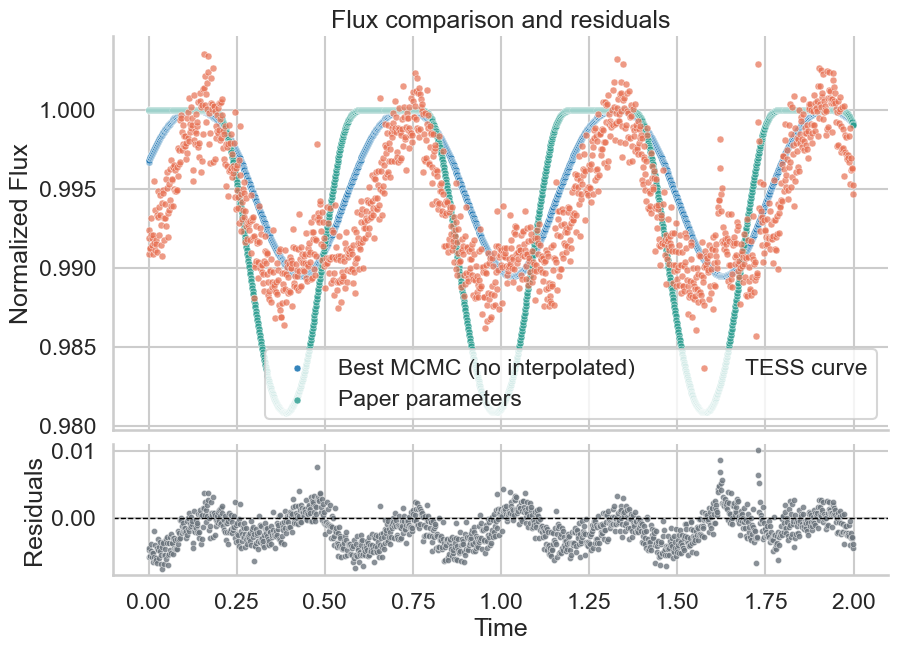

In [62]:
# Estilo general
sns.set_theme(
    style="whitegrid",
    context="talk",
    font_scale=1.0
)

# DataFrame principal
df = pd.DataFrame({
    "Time": time_mcmc_no_interpolated,
    "Flux_MCMC": flux_mcmc_no_interpolated,
    "Flux_Paper": flux_paper_parameters,
    "Flux_TESS": flux_tess,
    "Residuals": flux_tess - flux_mcmc_no_interpolated
})

# Figura con dos paneles
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(10, 7),
    sharex=True,
    gridspec_kw={"height_ratios": [3, 1], "hspace": 0.05}
)

# ─────────────────────
# Panel superior: Curvas
# ─────────────────────
sns.scatterplot(
    data=df,
    x="Time",
    y="Flux_MCMC",
    ax=ax1,
    label="Best MCMC (no interpolated)",
    s=25,
    alpha=0.9,
    color="#1f77b4"
)

sns.scatterplot(
    data=df,
    x="Time",
    y="Flux_Paper",
    ax=ax1,
    label="Paper parameters",
    s=25,
    alpha=0.8,
    color="#2a9d8f"
)

sns.scatterplot(
    data=df,
    x="Time",
    y="Flux_TESS",
    ax=ax1,
    label="TESS curve",
    s=25,
    alpha=0.7,
    color="#e76f51"
)

ax1.set_ylabel("Normalized Flux")
ax1.set_title("Flux comparison and residuals")
ax1.legend(frameon=True, ncol=2)
sns.despine(ax=ax1)

# ─────────────────────
# Panel inferior: Residuos (TESS − MCMC)
# ─────────────────────
sns.scatterplot(
    data=df,
    x="Time",
    y="Residuals",
    ax=ax2,
    s=20,
    alpha=0.8,
    color="#6c757d"
)

ax2.axhline(0, color="black", linestyle="--", linewidth=1)

ax2.set_xlabel("Time")
ax2.set_ylabel("Residuals")
sns.despine(ax=ax2)

plt.tight_layout()

plt.show()